## We covered a lot of information today and I'd like you to practice developing classification trees on your own. For each exercise, work through the problem, determine the result, and provide the requested interpretation in comments along with the code. The point is to build classifiers, not necessarily good classifiers (that will hopefully come later)

### 1. Load the iris dataset and create a holdout set that is 50% of the data (50% in training and 50% in test). Output the results (don't worry about creating the tree visual unless you'd like to) and discuss them briefly (are they good or not?)

In [29]:
import pandas as pd
%matplotlib inline
from sklearn import datasets
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
iris = datasets.load_iris() 

In [3]:
x = iris.data[:,2:] 
y = iris.target 

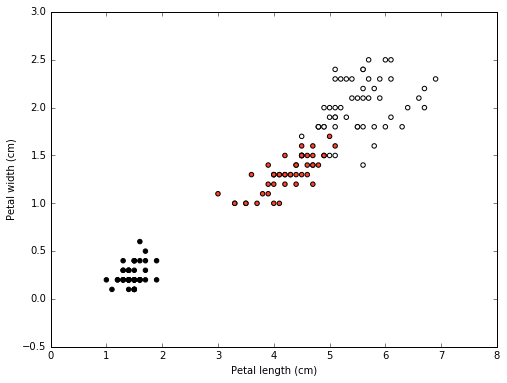

In [5]:
plt.figure(2, figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.CMRmap)
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')

In [8]:
dt = tree.DecisionTreeClassifier()
dt = dt.fit(x,y)

In [30]:
from sklearn.cross_validation import train_test_split

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.5,train_size=0.5)
dt = dt.fit(x_train,y_train)

In [31]:
from sklearn import metrics
import numpy as np

In [16]:
def measure_performance(X,y,clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred=clf.predict(X)
    if show_accuracy:
        print("Accuracy:{0:.5f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y,y_pred),"\n")
    if show_confussion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y,y_pred),"\n")
measure_performance(x_test,y_test,dt) 

Accuracy:0.94667 

Classification report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        24
          1       0.92      0.92      0.92        26
          2       0.92      0.92      0.92        25

avg / total       0.95      0.95      0.95        75
 

Confusion matrix
[[24  0  0]
 [ 0 24  2]
 [ 0  2 23]] 



### 2. Redo the model with a 75% - 25% training/test split and compare the results. Are they better or worse than before? Discuss why this may be.

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,train_size=0.75)
dt = dt.fit(x_train,y_train)
def measure_performance(X,y,clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred=clf.predict(X)
    if show_accuracy:
        print("Accuracy:{0:.75f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y,y_pred),"\n")
    if show_confussion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y,y_pred),"\n")
measure_performance(x_test,y_test,dt) 

Accuracy:0.947368421052631526357856728282058611512184143066406250000000000000000000000 

Classification report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        14
          1       0.89      0.89      0.89         9
          2       0.93      0.93      0.93        15

avg / total       0.95      0.95      0.95        38
 

Confusion matrix
[[14  0  0]
 [ 0  8  1]
 [ 0  1 14]] 



### 3. Load the breast cancer dataset (`datasets.load_breast_cancer()`) and perform basic exploratory analysis. What attributes to we have? What are we trying to predict?
For context of the data, see the documentation here: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

In [32]:
breast = datasets.load_breast_cancer() 
breast.data

array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02, ...,
          2.65400000e-01,   4.60100000e-01,   1.18900000e-01],
       [  2.05700000e+01,   1.77700000e+01,   1.32900000e+02, ...,
          1.86000000e-01,   2.75000000e-01,   8.90200000e-02],
       [  1.96900000e+01,   2.12500000e+01,   1.30000000e+02, ...,
          2.43000000e-01,   3.61300000e-01,   8.75800000e-02],
       ..., 
       [  1.66000000e+01,   2.80800000e+01,   1.08300000e+02, ...,
          1.41800000e-01,   2.21800000e-01,   7.82000000e-02],
       [  2.06000000e+01,   2.93300000e+01,   1.40100000e+02, ...,
          2.65000000e-01,   4.08700000e-01,   1.24000000e-01],
       [  7.76000000e+00,   2.45400000e+01,   4.79200000e+01, ...,
          0.00000000e+00,   2.87100000e-01,   7.03900000e-02]])

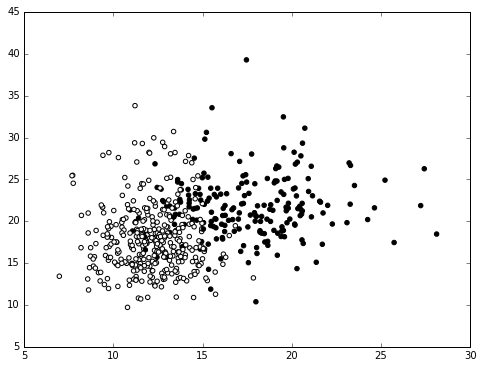

In [33]:
x = breast.data[:,:] # the attributes
y = breast.target
plt.figure(2, figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.CMRmap)

### 4. Using the breast cancer data, create a classifier to predict the type of seed. Perform the above hold out evaluation (50-50 and 75-25) and discuss the results.

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.5,train_size=0.5)
dt = dt.fit(x_train,y_train)
def measure_performance(X,y,clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred=clf.predict(X)
    if show_accuracy:
        print("Accuracy:{0:.5f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y,y_pred),"\n")
    if show_confussion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y,y_pred),"\n")
measure_performance(x_test,y_test,dt) 

Accuracy:0.92632 

Classification report
             precision    recall  f1-score   support

          0       0.90      0.89      0.90       104
          1       0.94      0.94      0.94       181

avg / total       0.93      0.93      0.93       285
 

Confusion matrix
[[ 93  11]
 [ 10 171]] 



In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,train_size=0.75)
dt = dt.fit(x_train,y_train)
def measure_performance(X,y,clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred=clf.predict(X)
    if show_accuracy:
        print("Accuracy:{0:.75f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y,y_pred),"\n")
    if show_confussion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y,y_pred),"\n")
measure_performance(x_test,y_test,dt) 

Accuracy:0.916083916083916038886059141077566891908645629882812500000000000000000000000 

Classification report
             precision    recall  f1-score   support

          0       0.89      0.89      0.89        56
          1       0.93      0.93      0.93        87

avg / total       0.92      0.92      0.92       143
 

Confusion matrix
[[50  6]
 [ 6 81]] 

